In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


### Loading the Data

In [2]:
# group seasons and return df grouped by player ID
def combine_seasons(seasons):
    # load first season of group
    final = pd.read_csv(seasons[0])
    final = final.drop_duplicates(subset='Id', keep="first")
    
    for season in seasons[1:]:
        df = pd.read_csv(season)
        
        # first line for each player has their totals for the year
        df = df.drop_duplicates(subset='Id', keep="first")
        
        # add stats to previous seasons
        final = pd.concat([final, df])
        
    # group by player ID and get mean stats    
    final = final.groupby(['Id']).agg({'Rk': 'first',
                                       'Player': 'first',
                                       'Age': 'mean',
                                       'Tm': 'last',
                                       'Pos': 'last',
                                       'GP': 'mean',
                                       'G': 'mean',
                                       'A': 'mean',
                                       'PTS': 'mean',
                                       '+/-': 'mean',
                                       'PIM': 'mean',
                                       'PS': 'mean',
                                       'EV': 'mean',
                                       'PP': 'mean',
                                       'SH': 'mean',
                                       'GW': 'mean',
                                       'EV.1': 'mean',
                                       'PP.1': 'mean',
                                       'SH.1': 'mean',
                                       'S': 'mean',
                                       'S%': 'mean'})
    
    final = final.reset_index()
        
    return final

In [3]:
# forming the groups
group1 = ['data/89-90.csv', 'data/90-91.csv', 
          'data/91-92.csv', 'data/92-93.csv', 'data/93-94.csv']

group2 = ['data/94-95.csv', 'data/95-96.csv', 
          'data/96-97.csv', 'data/97-98.csv', 'data/98-99.csv']

group3 = ['data/99-00.csv', 'data/00-01.csv', 
          'data/01-02.csv', 'data/02-03.csv', 'data/03-04.csv']

group4 = ['data/05-06.csv', 'data/06-07.csv', 
          'data/07-08.csv', 'data/08-09.csv', 'data/09-10.csv']

group5 = ['data/10-11.csv', 'data/11-12.csv', 
          'data/12-13.csv', 'data/13-14.csv', 'data/14-15.csv']

group6 = ['data/15-16.csv', 'data/16-17.csv', 
          'data/17-18.csv', 'data/18-19.csv', 'data/19-20.csv']

In [4]:
# getting dataframes for each group
group1 = combine_seasons(group1)
group2 = combine_seasons(group2)
group3 = combine_seasons(group3)
group4 = combine_seasons(group4)
group5 = combine_seasons(group5)
group6 = combine_seasons(group6)

In [5]:
group6

,Id,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,...,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%
0,abbotsp01,1,Spencer Abbott,28.0,CHI,LW,1.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.000
1,abdelju01,1,Justin Abdelkader,30.0,DET,LW,68.20,9.00,15.00,24.00,...,1.24,5.6,3.20,0.2,1.00,11.8,3.00,0.2,100.80,7.420
2,abergpo01,3,Pontus Aberg,24.5,TOR,LW,33.00,4.25,6.75,11.00,...,0.80,3.5,0.75,0.0,1.00,5.5,1.25,0.0,46.75,6.475
3,abramvi01,3,Vitaly Abramov,20.5,OTT,RW,1.50,0.50,0.00,0.50,...,0.05,0.5,0.00,0.0,0.00,0.0,0.00,0.0,1.50,33.300
4,acciano01,2,Noel Acciari,26.0,FLA,C,49.20,7.60,4.00,11.60,...,0.80,7.2,0.00,0.4,1.40,4.0,0.00,0.0,63.00,9.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,zolniha01,895,Harry Zolnierczyk,28.5,NSH,LW,12.50,1.00,1.00,2.00,...,0.05,1.0,0.00,0.0,0.00,1.0,0.00,0.0,10.00,5.250
1445,zubruda01,896,Dainius Zubrus,37.0,SJS,C,50.00,3.00,4.00,7.00,...,0.40,3.0,0.00,0.0,0.00,4.0,0.00,0.0,33.00,9.100
1446,zuccama01,897,Mats Zuccarello,30.0,MIN,LW,70.80,16.80,33.20,50.00,...,4.82,13.0,3.80,0.0,2.60,22.8,10.40,0.0,146.60,11.940
1447,zuckeja01,898,Jason Zucker,26.0,TOT,LW,74.60,21.80,21.60,43.40,...,5.00,17.0,4.40,0.4,4.00,16.6,4.60,0.4,175.40,12.740


### Pairplots

In [6]:
# sns.pairplot(group1, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group1_pair.png')

In [7]:
# sns.pairplot(group2, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group2_pair.png')

In [8]:
# sns.pairplot(group3, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group3_pair.png')

In [9]:
# sns.pairplot(group4, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group4_pair.png')

In [10]:
# sns.pairplot(group5, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group5_pair.png')

In [11]:
# sns.pairplot(group6, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group6_pair.png')

### Prepping data

In [12]:
# Split groups into qual and quant features
def prep_group(group):
    players = group[['Player', 'Pos', 'Id']]
    X = group.drop(['Player', 'Pos', 'Id', 'Tm'], axis=1)
    
    # drop bottom X% of players by GP?
    
    return X, players

In [13]:
# get qual and quant features for each group
X1, player1 = prep_group(group1)
X2, player2 = prep_group(group2)
X3, player3 = prep_group(group3)
X4, player4 = prep_group(group4)
X5, player5 = prep_group(group5)
X6, player6 = prep_group(group6)

In [14]:
player1.head(2)

,Player,Pos,Id
0,Keith Acton,C,actonke01
1,Greg Adams,LW,adamsgr01


In [15]:
X1.head(2)

,Rk,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%
0,1,33.0,71.0,8.8,13.8,22.6,-6.0,86.2,0.4,7.8,0.4,0.6,0.8,12.2,1.0,0.6,80.4,10.18
1,3,29.0,35.0,4.0,10.0,14.0,-2.0,33.0,0.4,4.0,0.0,0.0,0.0,9.0,1.0,0.0,27.0,14.80


### Clustering

In [16]:
def labelled_scatterplot(data=None, x=None, y=None, labs=None):
    p1 = sns.scatterplot(data=data, x=x, y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

In [17]:
# build clustering func
def cluster_groups(X, player=None):
    names = player.Player.values
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        pipe = Pipeline([
            ('fillwith1', SimpleImputer(strategy="median")),
            ('scale',StandardScaler()),
            ('pca', PCA(n_components=2,random_state=671)),
            ('cluster', KMeans(n_clusters=n_clusters) ),
        ])
        cluster_labels = pipe.fit_predict(X)
        Xtransformed = pipe.transform(X) # imputed and scaled, fed to pca, and return results
        Xtransformed2 = pd.concat([pd.DataFrame({'who':names}),pd.DataFrame(Xtransformed)],axis=1)

        # return Xtransformed
        clusterer = pipe.named_steps.cluster

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        # ax2.scatter(Xtransformed[:, 0], Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
        #             c=colors, edgecolor='k')


        x = sns.scatterplot(x=Xtransformed[:, 0], y=Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        for line in range(0,Xtransformed2.shape[0]):
            if Xtransformed2['who'][line] in ['Steve Yzerman*', 'Brett Hull*', 'Sean Avery']:
                 x.text(Xtransformed2[0][line]+0.01, Xtransformed2[1][line], 
                 Xtransformed2['who'][line], horizontalalignment='left', 
                 size='medium', color=colors[line])

        # ax2.x

        # ax2.scatter(data=Xtransformed2, x='pca1', y='pca2',marker='o', s=30, lw=0, alpha=0.7,
        #             c=colors, edgecolor='k', labs='who')
        # labelled_scatterplot(Xtransformed2,Xtransformed2[0].values,Xtransformed2[1].values,'who')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        # print(centers)

        # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #             c="white", alpha=1, s=200, edgecolor='k')

        # for i, c in enumerate(centers):
        #     print(c)
        #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                 s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6317237398744506


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5568617681142481


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5445629479966057


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.49928758859163136


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4679768156516169


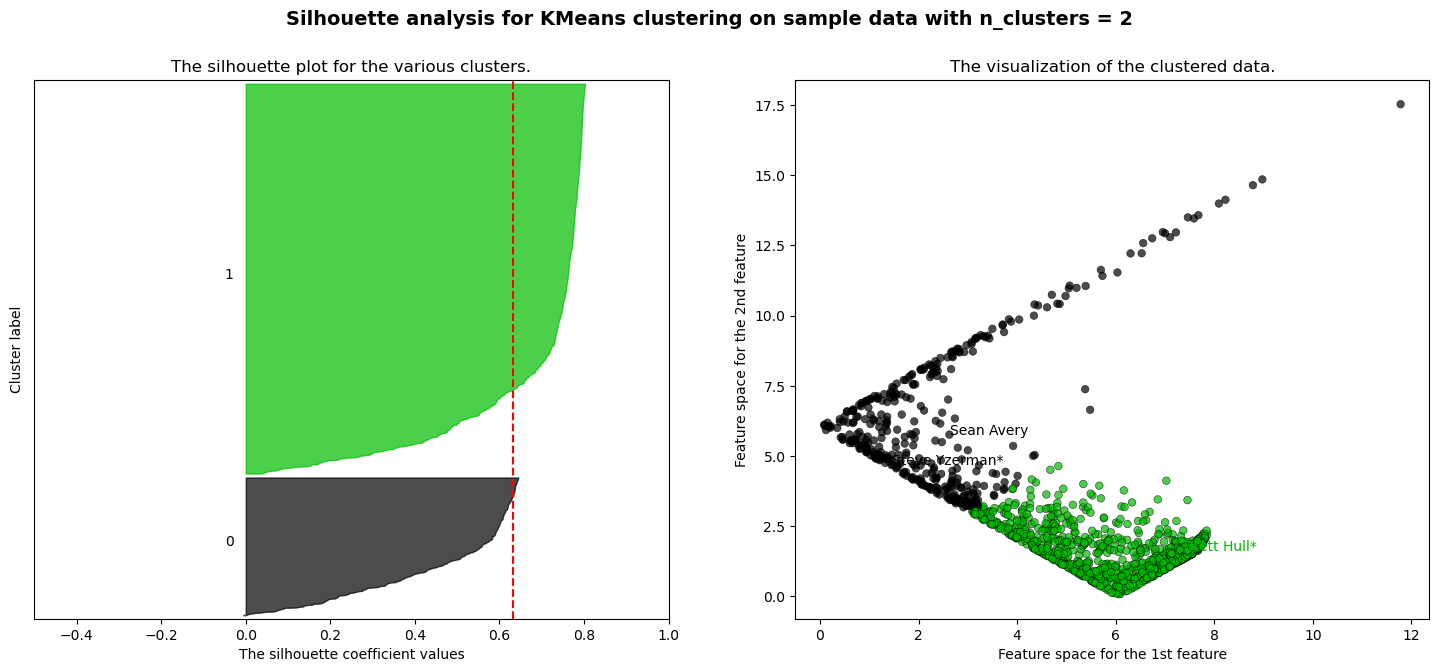

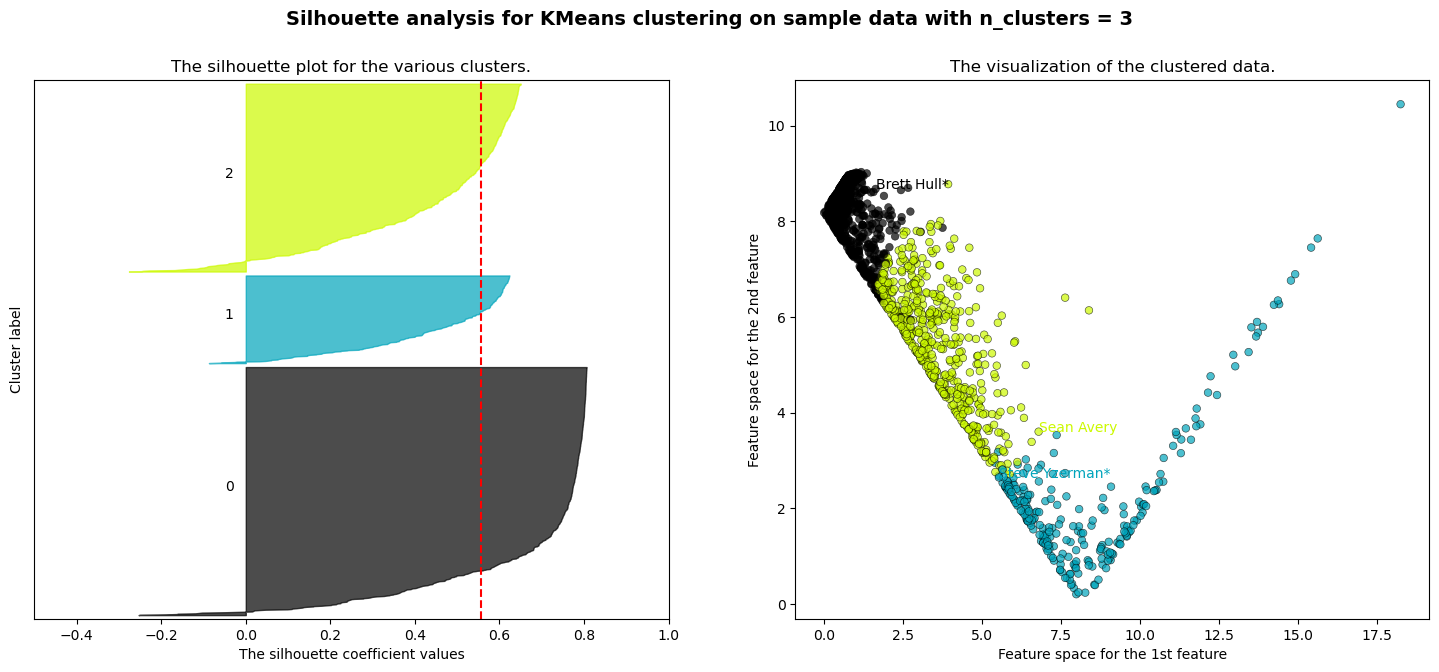

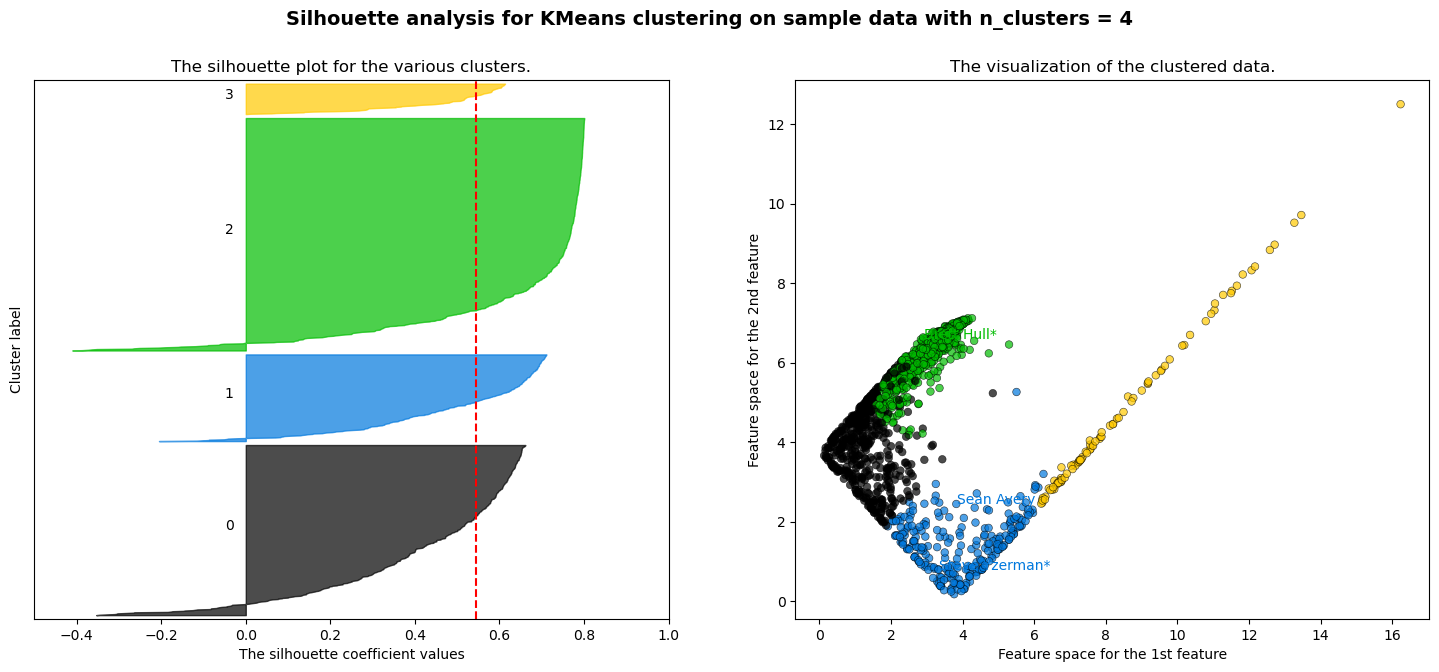

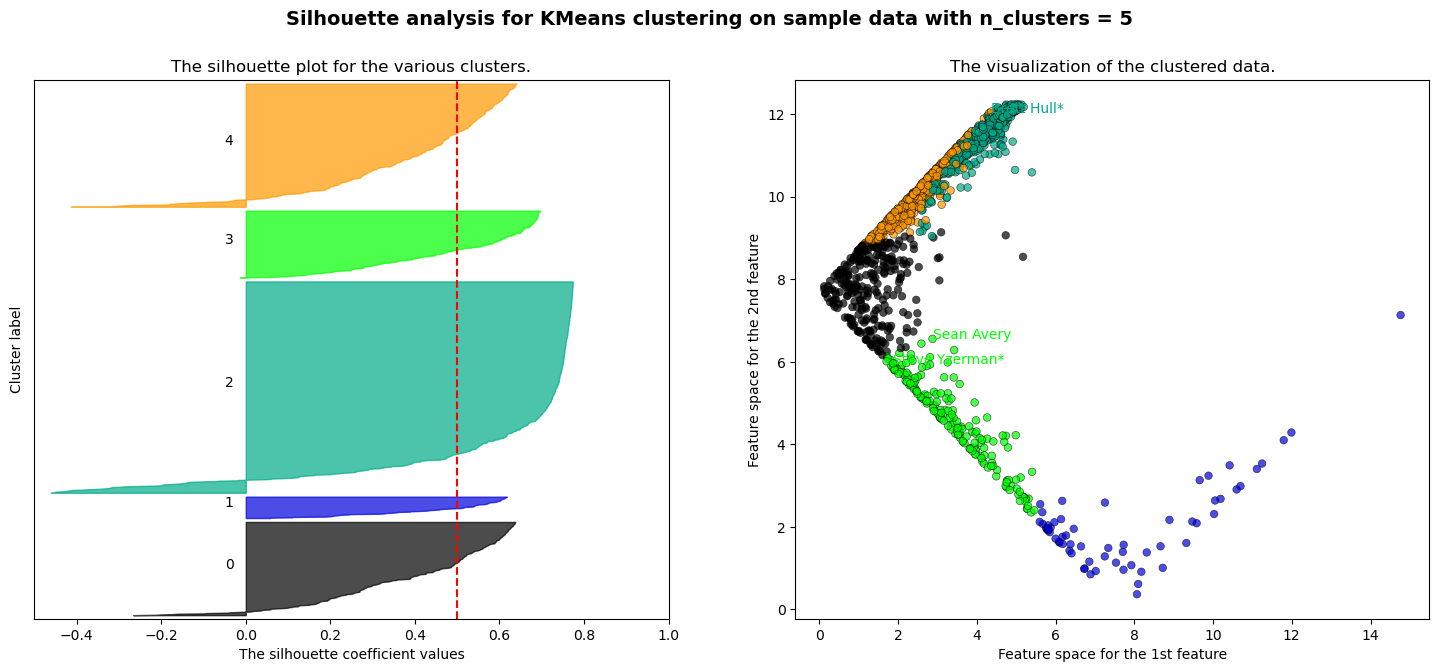

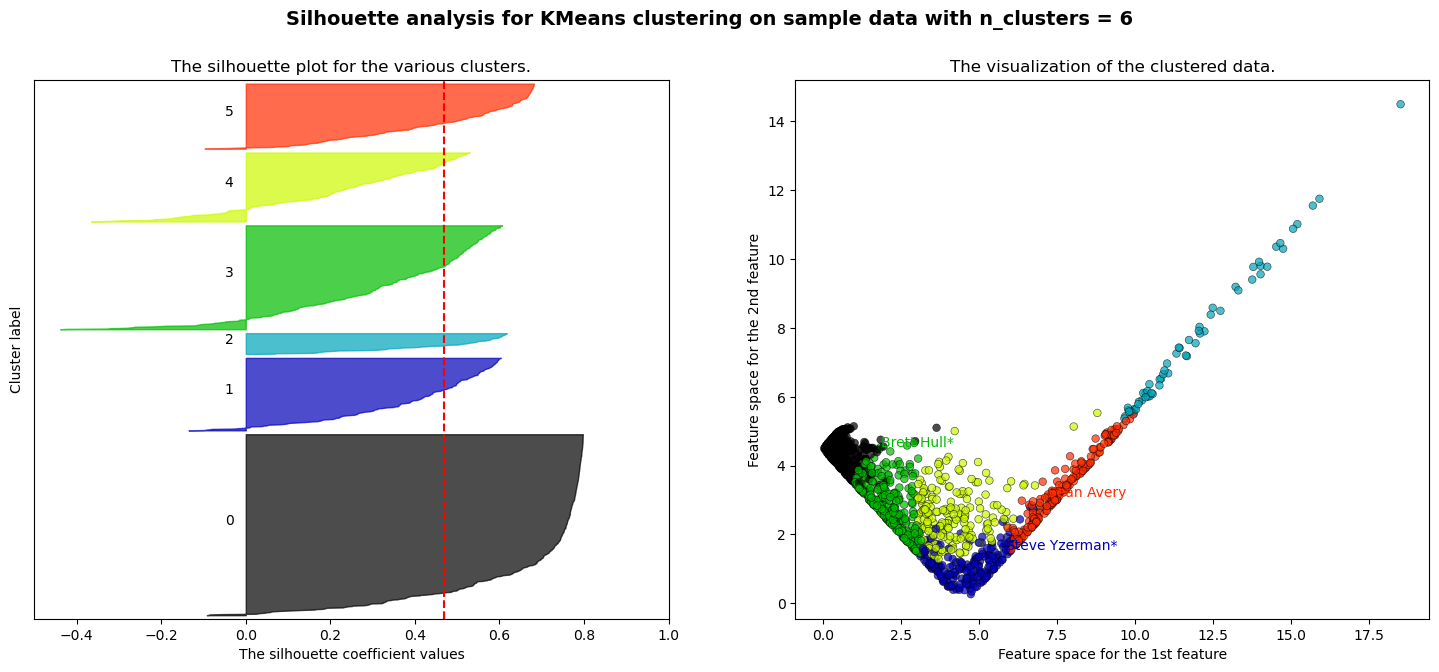

In [18]:
cluster_groups(X4, player4)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6366339763285693


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5620653062468213


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5220637539749392


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.47626276873883355


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.46509023216360845


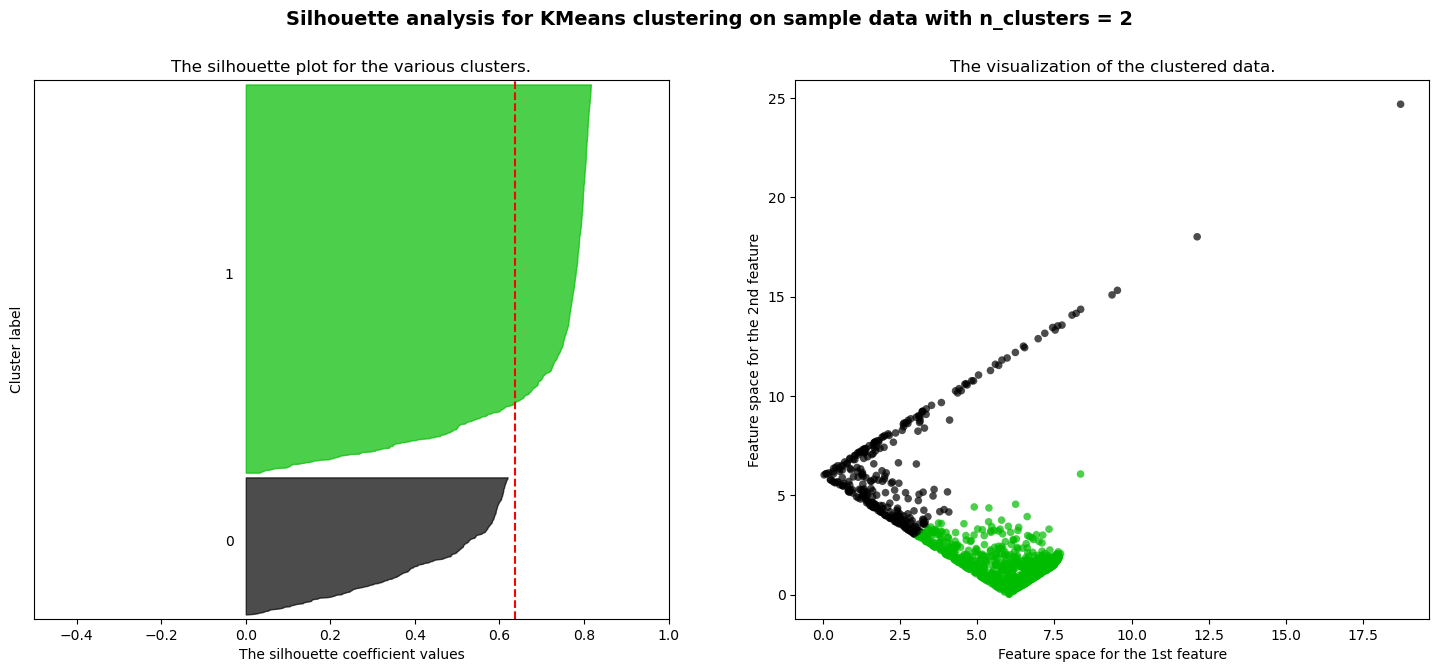

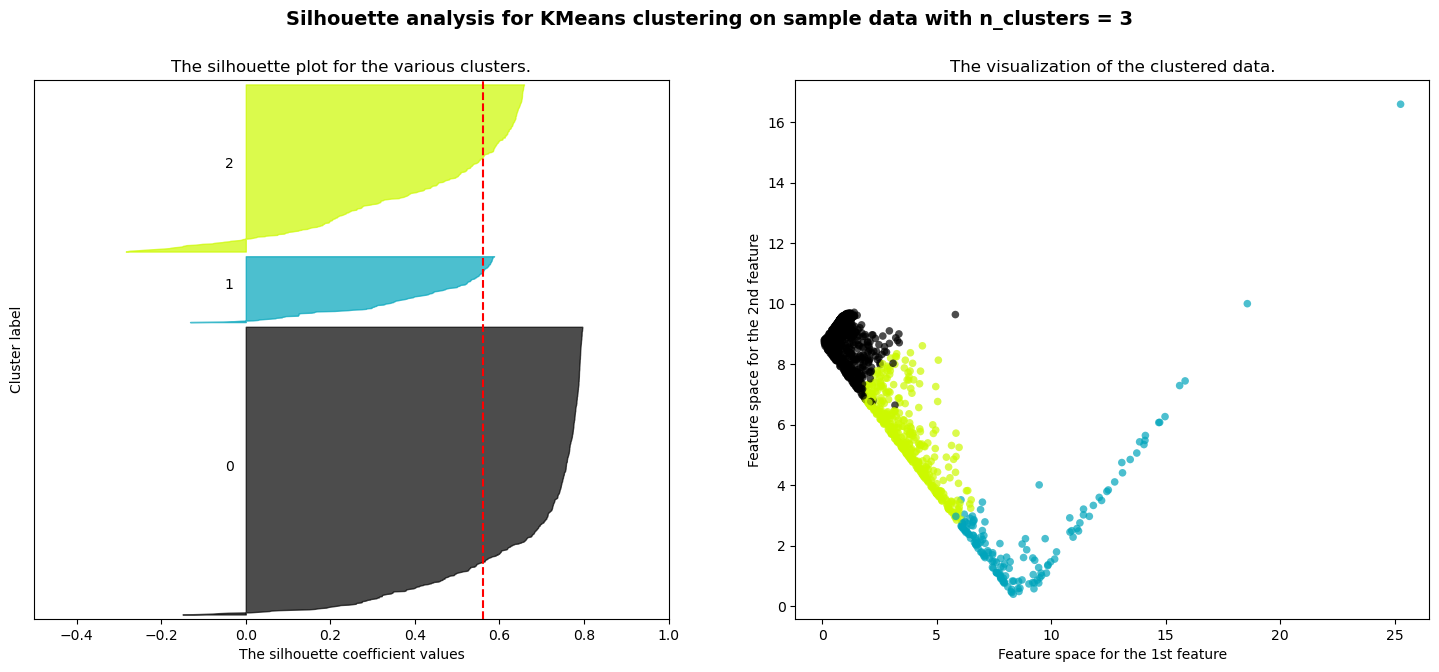

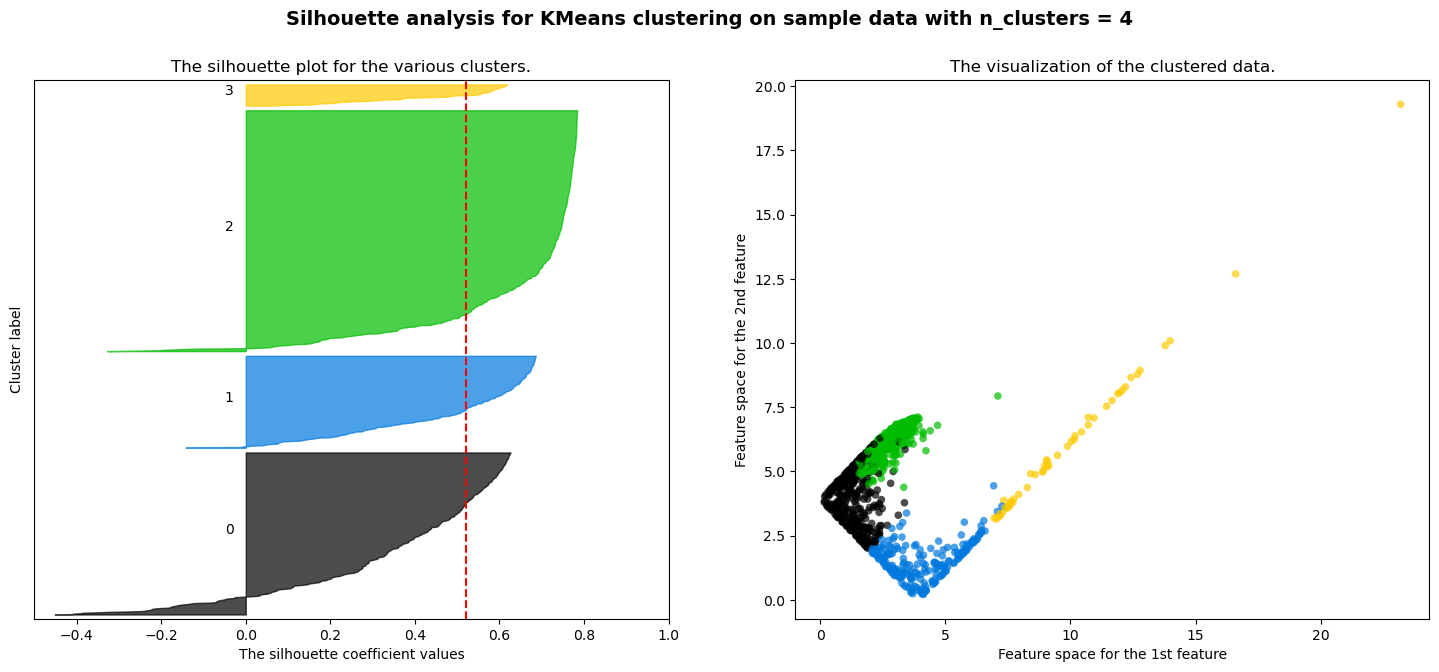

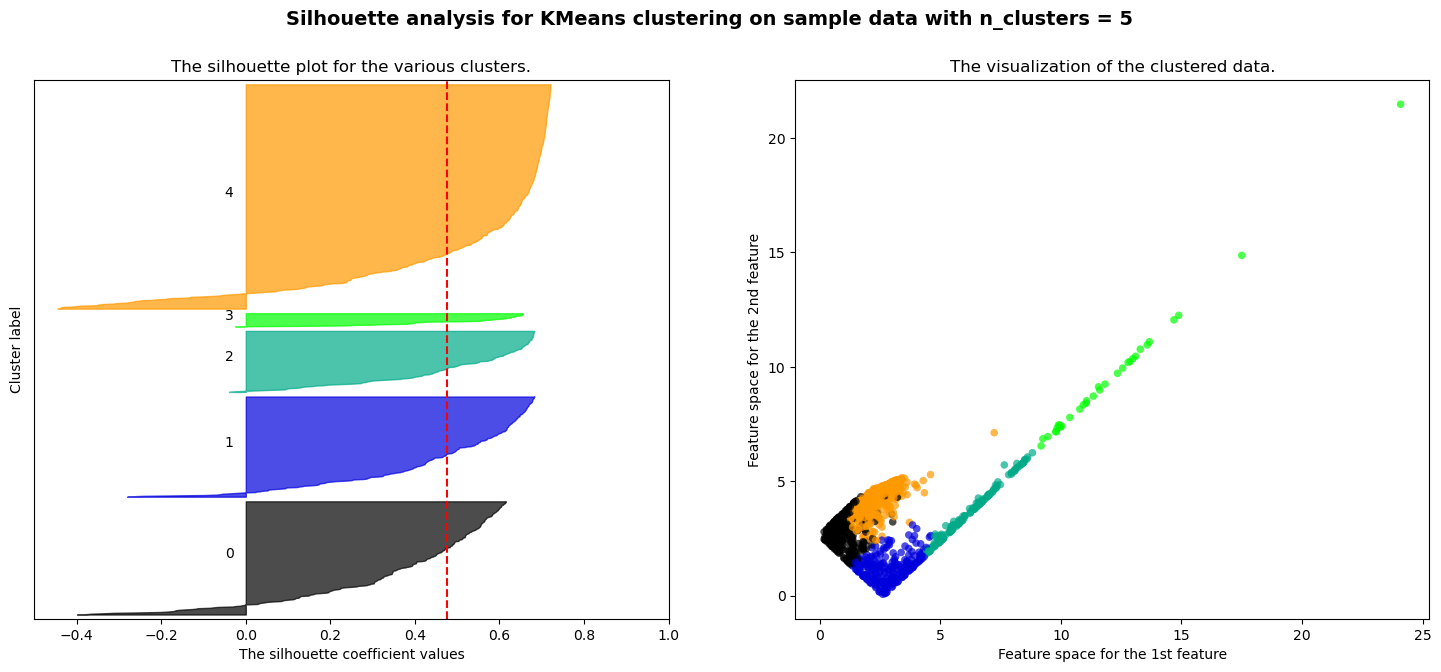

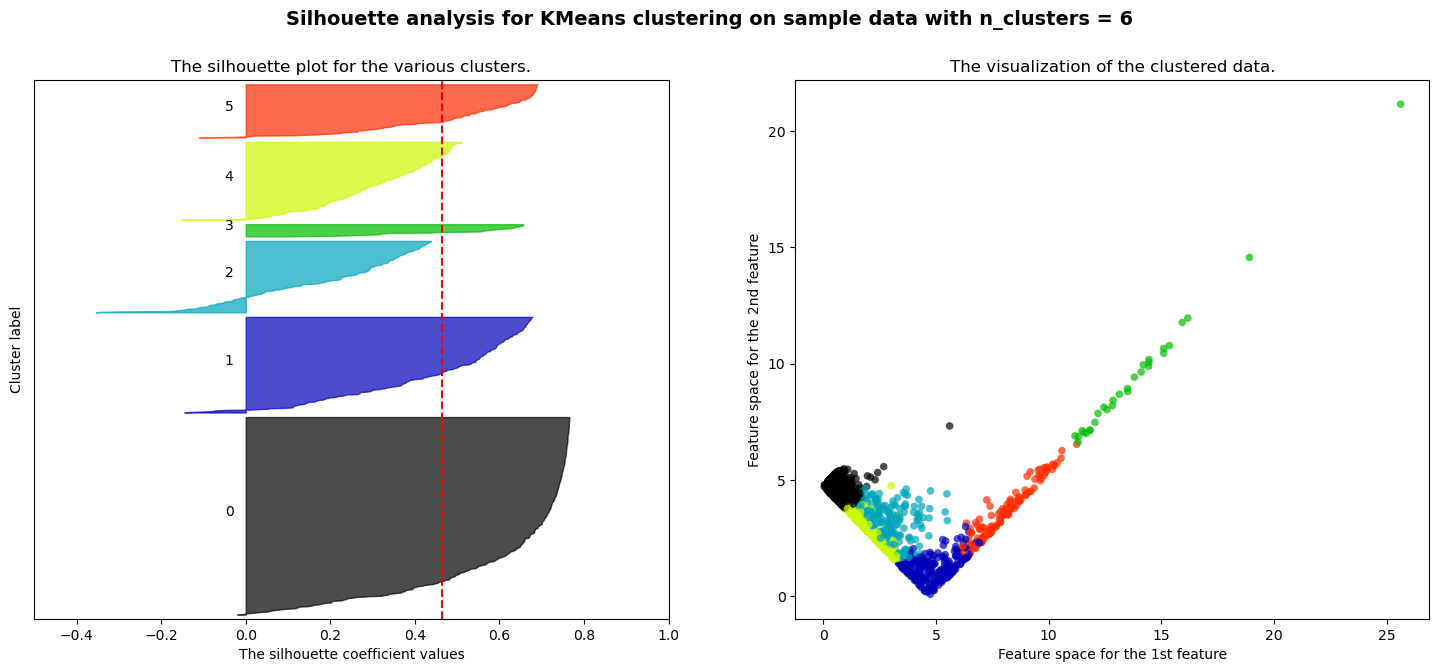

In [42]:
cluster_groups(X2)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6269399850590598


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5599219078362823


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5109953403444144


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4789914344769064


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4843109178162664


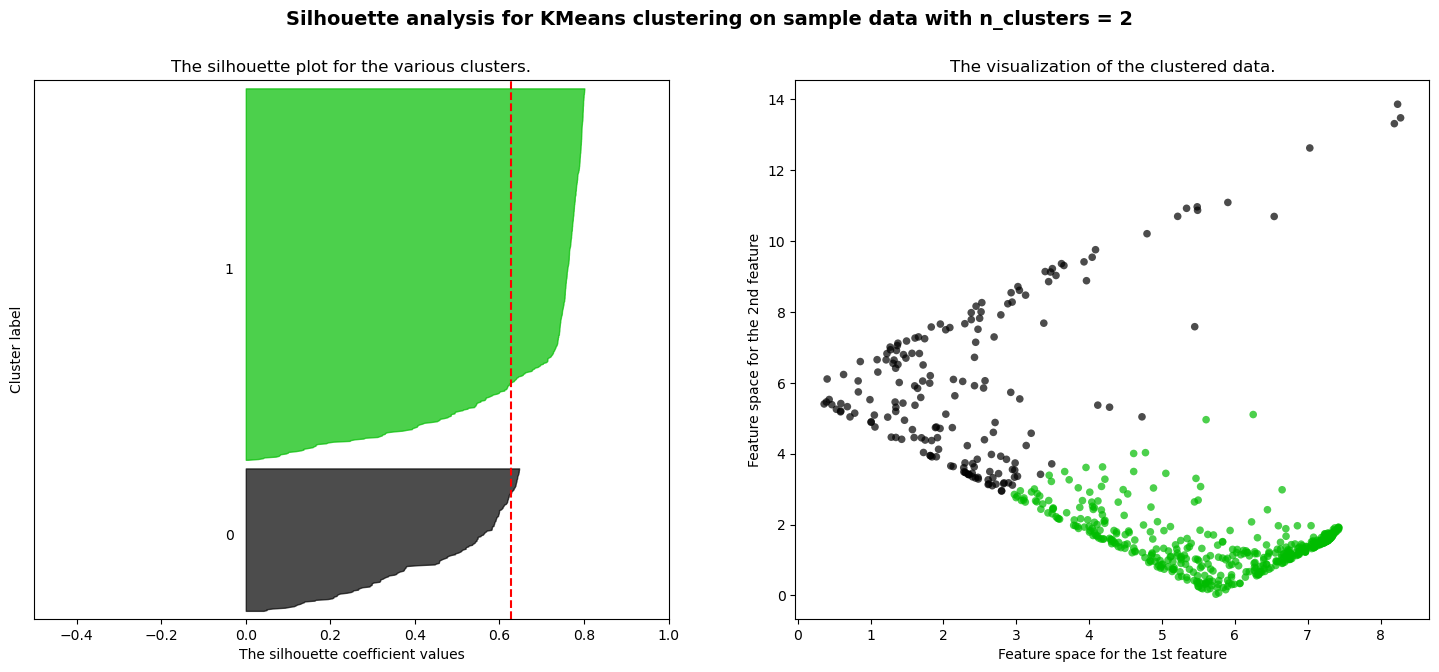

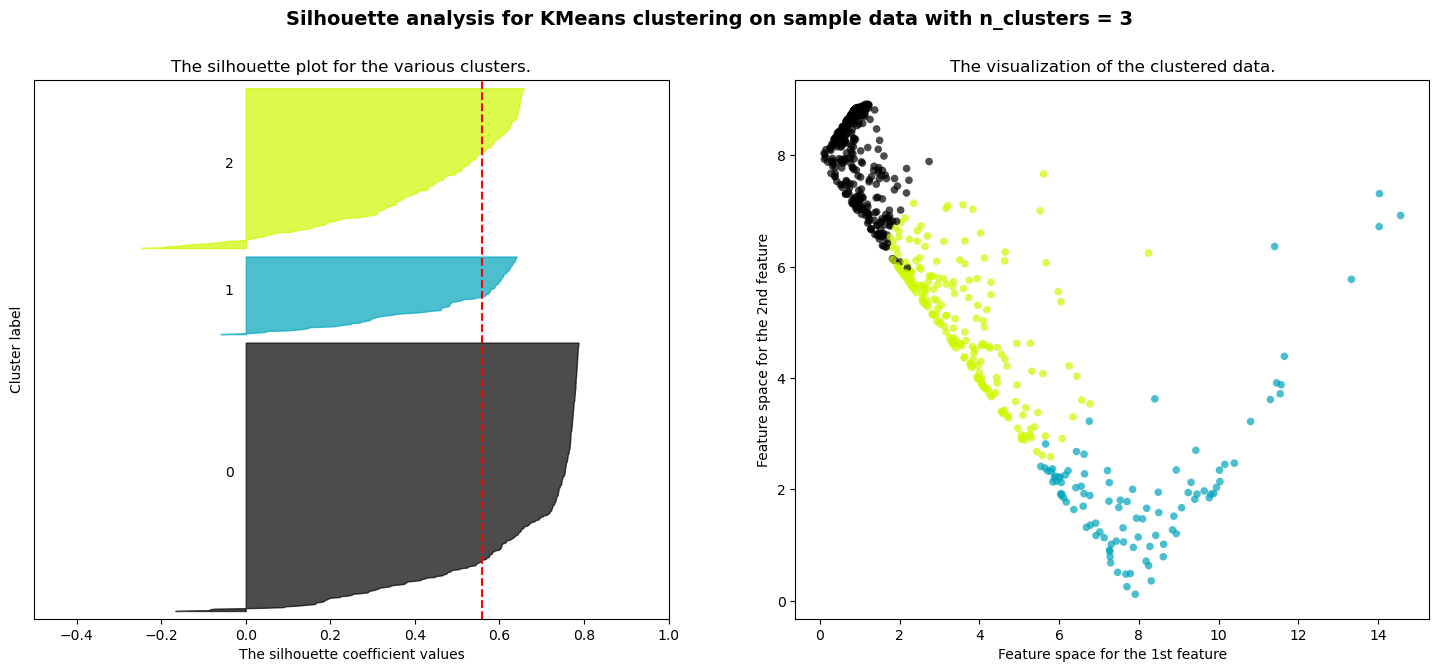

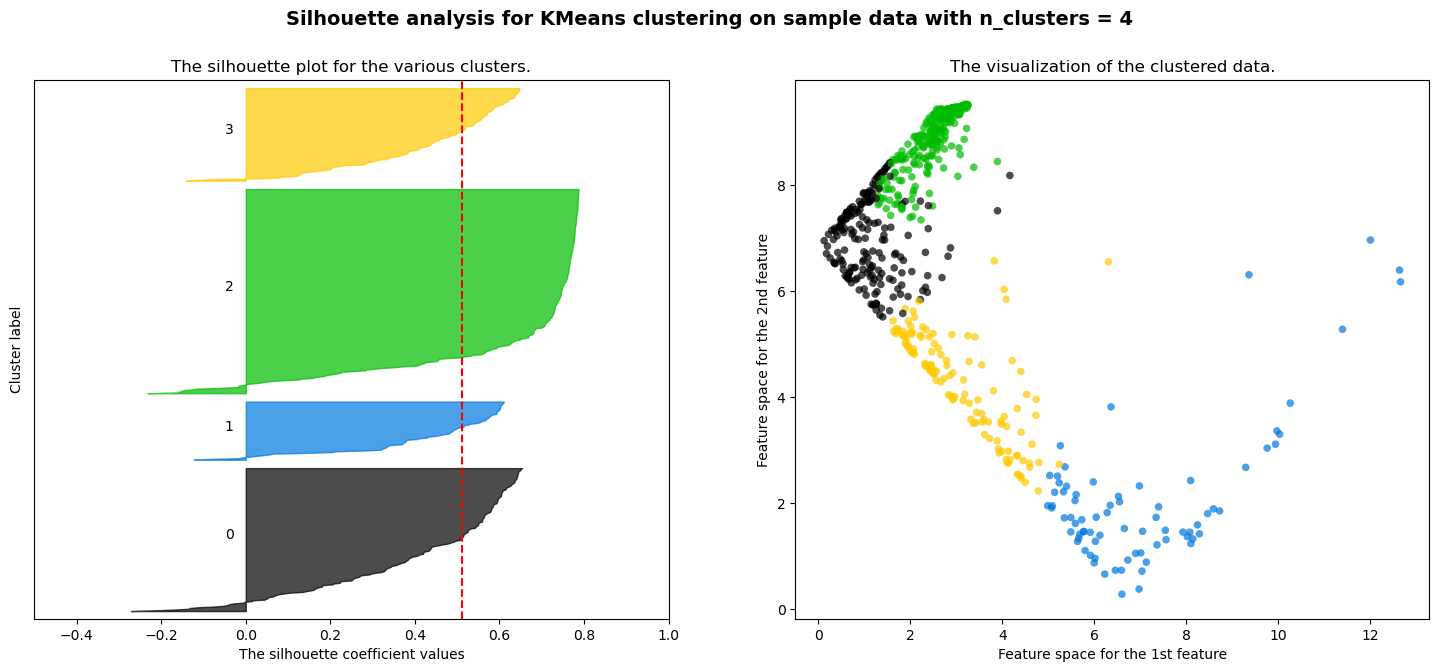

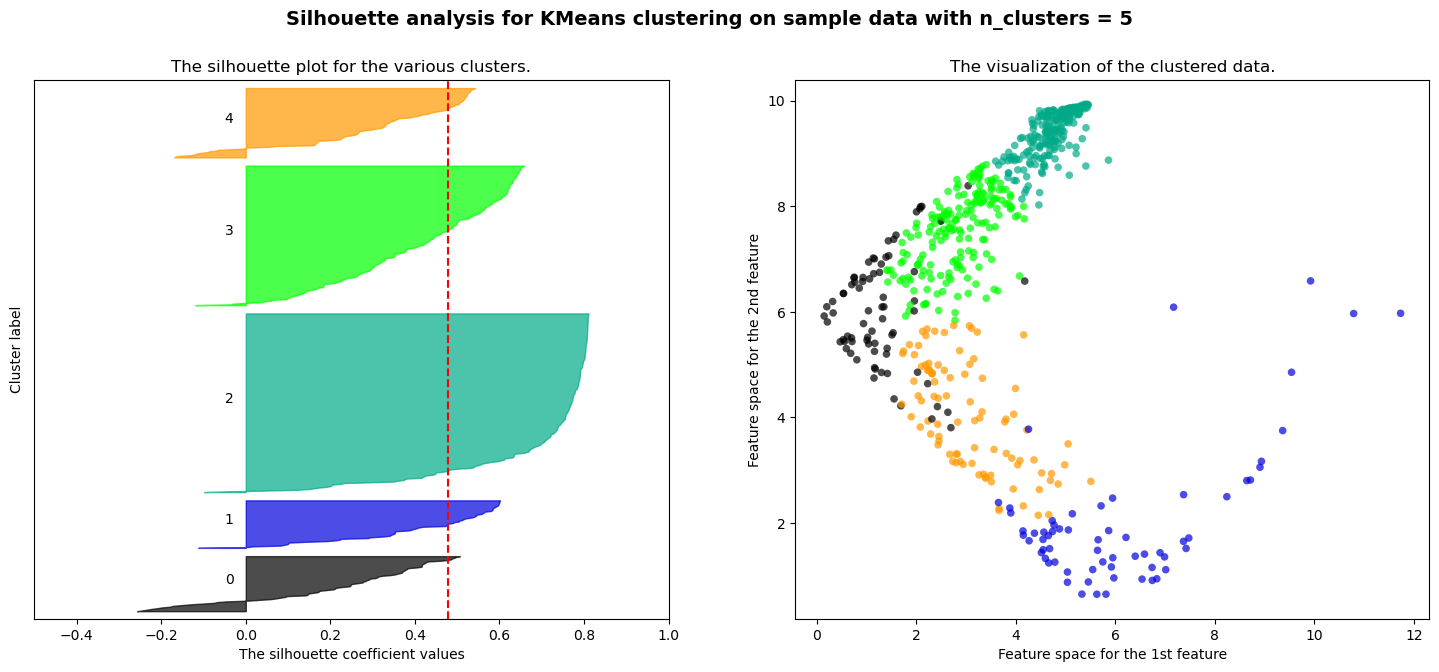

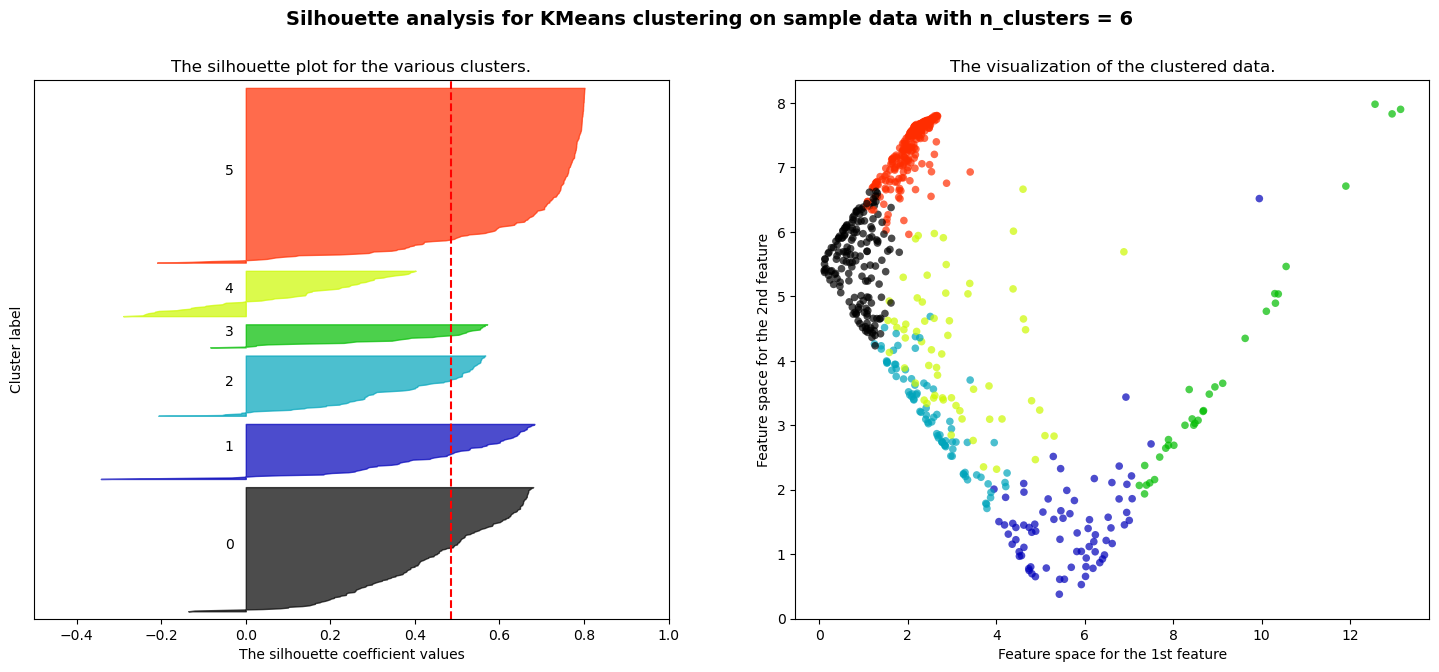

In [23]:
# applying pipeline and clustering

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    pipe = Pipeline([
        ('fillwith1', SimpleImputer(strategy="mean")),
        ('scale',StandardScaler()),
        ('pca', PCA(n_components=2,random_state=671)),
        ('cluster', KMeans(n_clusters=n_clusters) ),
    ])
    cluster_labels = pipe.fit_predict(X)
    Xtransformed = pipe.transform(X) # imputed and scaled, fed to pca, and return results
    clusterer = pipe.named_steps.cluster

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xtransformed[:, 0], Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     # print(centers)
    
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         print(c)
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()